# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
#Libraries for graph visualization
import networkx as nx

In [2]:
%load_ext autoreload
%autoreload 2

In [24]:
from network_ad.config import DATA_PATH
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [4]:
from network_ad.config import RAW_DATA_FILE


def load_data():
    return pd.read_csv(DATA_PATH / RAW_DATA_FILE)

data_df = load_data()


In [5]:
data_df.head(n=50)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,59.166.0.5,1305,149.171.126.8,21,6,1.0,9,1,193,3,...,0,7240,0,0,0,0,0,331.0,0,Benign
1,59.166.0.5,1305,149.171.126.8,21,6,1.0,261,5,469,7,...,8688,8688,18944,74,0,0,0,230.0,0,Benign
2,59.166.0.5,1305,149.171.126.8,21,6,1.0,481,9,750,11,...,10136,10136,33792,132,0,0,0,229.0,0,Benign
3,59.166.0.5,1305,149.171.126.8,21,6,1.0,701,13,1054,15,...,11584,11584,48640,190,0,0,0,125.0,0,Benign
4,59.166.0.5,1305,149.171.126.8,21,6,1.0,1031,19,1474,21,...,14480,13032,64256,251,0,0,0,230.0,0,Benign
5,59.166.0.5,1305,149.171.126.8,21,6,1.0,1251,23,1751,25,...,15928,14480,13568,53,0,0,0,229.0,0,Benign
6,59.166.0.5,1305,149.171.126.8,21,6,1.0,1493,27,2054,29,...,17376,15928,31232,122,0,0,0,125.0,0,Benign
7,175.45.176.1,42208,149.171.126.14,21,6,1.0,309,7,556,7,...,16383,16383,38400,150,0,0,0,227.0,0,Benign
8,59.166.0.5,1305,149.171.126.8,21,6,1.0,1817,33,2510,35,...,20272,17376,46080,180,0,0,0,229.0,0,Benign
9,59.166.0.5,1305,149.171.126.8,21,6,1.0,2059,37,2814,39,...,21720,18824,63744,249,0,0,0,125.0,0,Benign


In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390275 entries, 0 to 2390274
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   IPV4_SRC_ADDR                object 
 1   L4_SRC_PORT                  int64  
 2   IPV4_DST_ADDR                object 
 3   L4_DST_PORT                  int64  
 4   PROTOCOL                     int64  
 5   L7_PROTO                     float64
 6   IN_BYTES                     int64  
 7   IN_PKTS                      int64  
 8   OUT_BYTES                    int64  
 9   OUT_PKTS                     int64  
 10  TCP_FLAGS                    int64  
 11  CLIENT_TCP_FLAGS             int64  
 12  SERVER_TCP_FLAGS             int64  
 13  FLOW_DURATION_MILLISECONDS   int64  
 14  DURATION_IN                  int64  
 15  DURATION_OUT                 int64  
 16  MIN_TTL                      int64  
 17  MAX_TTL                      int64  
 18  LONGEST_FLOW_PKT             int64  
 19  

In [7]:
# Number of distinct source IP  and destination IP
print("Number of distinct source IP and destination IP: ", data_df['IPV4_SRC_ADDR'].nunique(), data_df['IPV4_DST_ADDR'].nunique())

Number of distinct source IP and destination IP:  40 40


## Distribution of number of occurences of each source and destination IP
-------------------------
Note that 75% of source IP appear less than 6 times and 75% of destination IP appear less than 9 times.

In [9]:

display(data_df['IPV4_SRC_ADDR'].value_counts().describe())
# Distribution of number of occurences of each destination IP
display(data_df['IPV4_DST_ADDR'].value_counts().describe())

count        40.000000
mean      59756.875000
std       97497.790204
min           1.000000
25%         292.750000
50%         591.000000
75%       78463.000000
max      230357.000000
Name: IPV4_SRC_ADDR, dtype: float64

count        40.000000
mean      59756.875000
std       97241.795347
min           1.000000
25%         531.500000
50%        6734.500000
75%       65465.750000
max      230043.000000
Name: IPV4_DST_ADDR, dtype: float64

## Distribution of labels
-------------------------
We can see that there are 96.4% of normal traffic and 3.6% of malicious traffic.

<AxesSubplot:>

<AxesSubplot:ylabel='Label'>

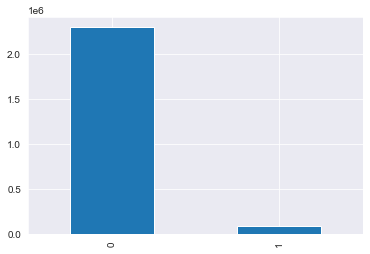

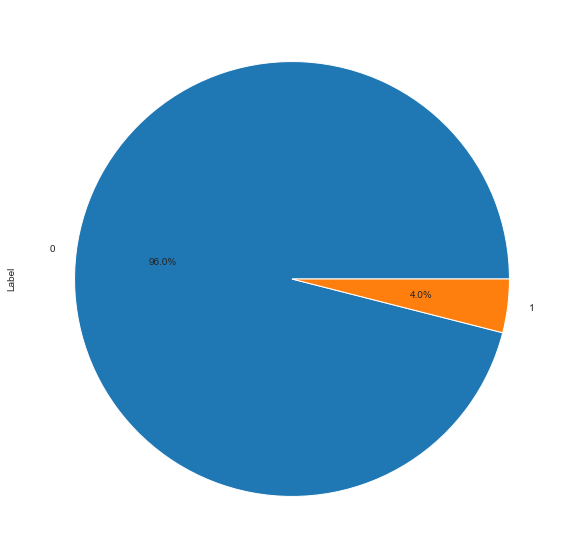

In [22]:
#Statistical description of the labels (with absolute values not Frequency)
display(data_df['Label'].value_counts().plot(kind='bar'))

plt.figure(figsize=(10,10))
data_df['Label'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
data_df.Attack.value_counts()

<AxesSubplot:>

<AxesSubplot:ylabel='Attack'>

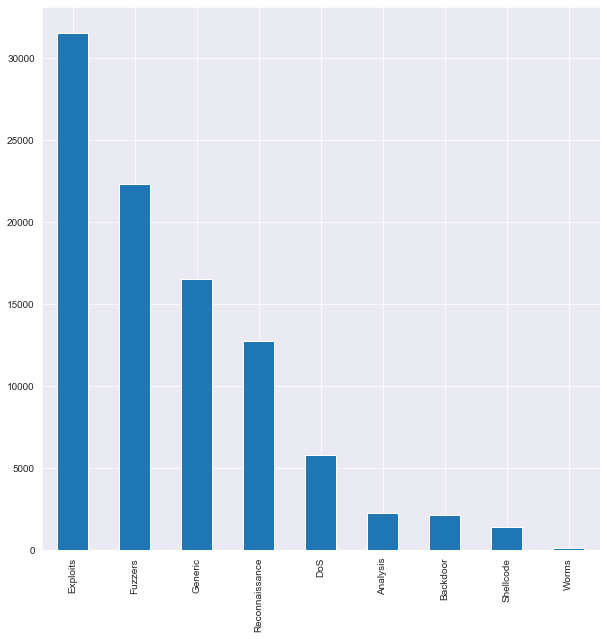

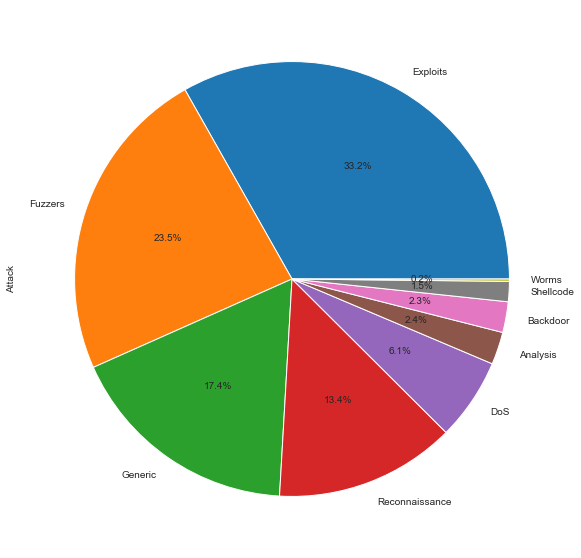

In [25]:
# distribution of attack types (large PIe chart)
plt.figure(figsize=(10,10))
display(data_df.query('Label != 0')['Attack'].value_counts().plot(kind='bar'))

plt.figure(figsize=(10,10))
data_df.query('Label != 0')['Attack'].value_counts().plot.pie(autopct='%1.1f%%')

## Correlation Analyis

<AxesSubplot:>

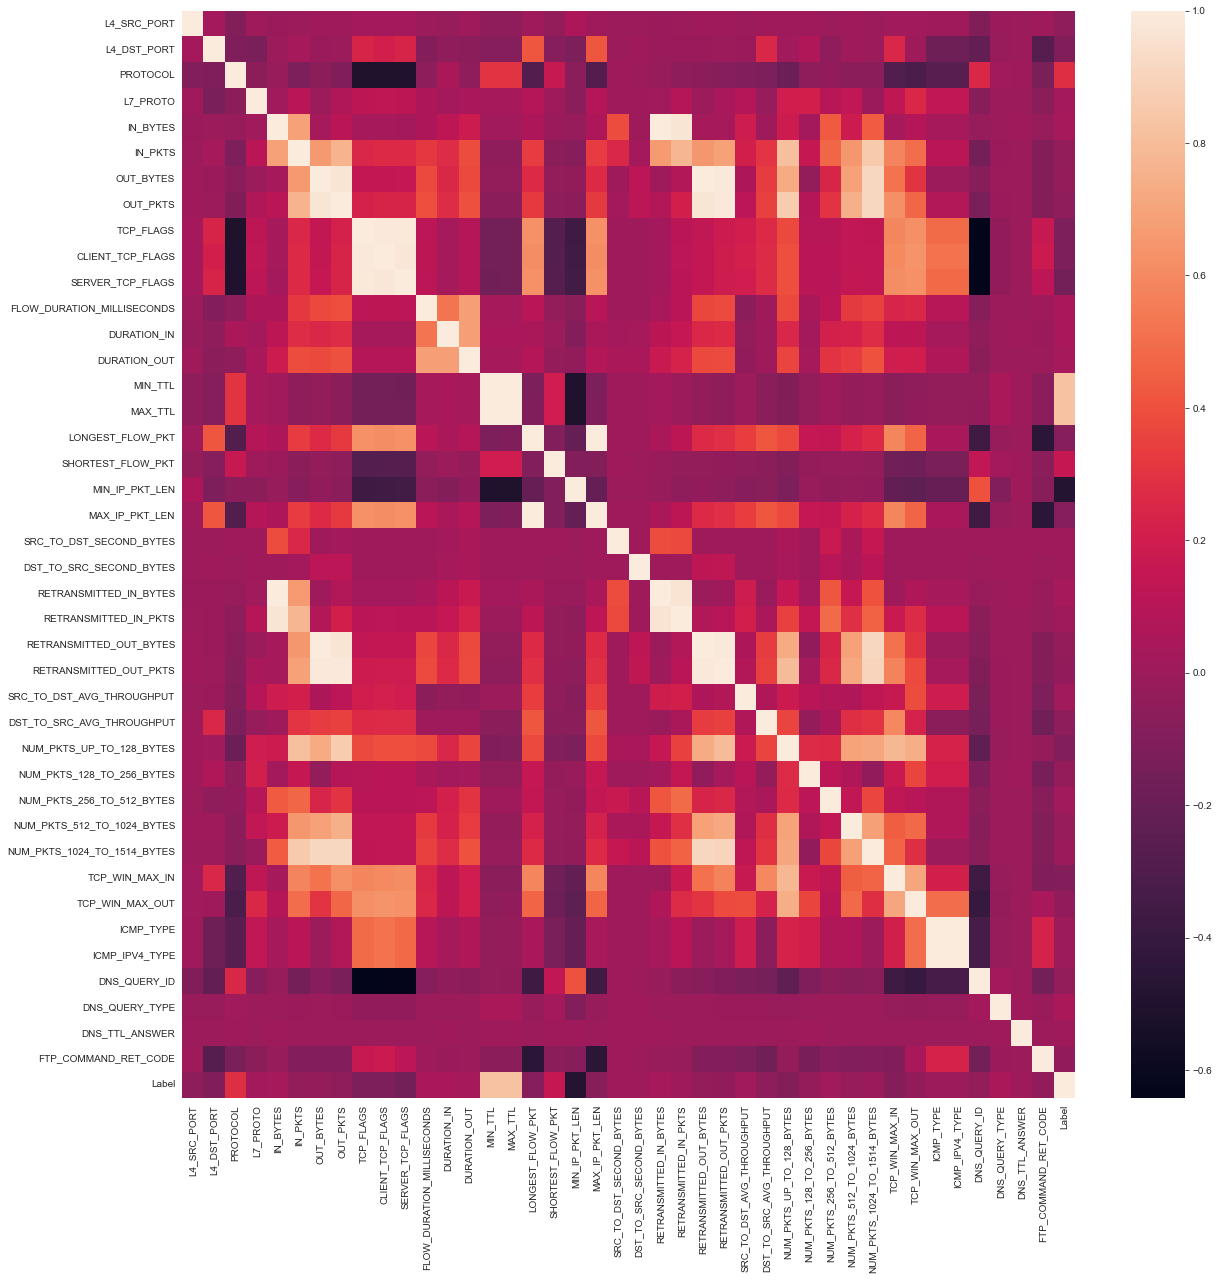

In [27]:
plt.figure(figsize=(20,20))

sns.heatmap(data_df.corr())

## Top 20 most correlated features with the label

In [30]:
data_df.corr().abs()['Label'].sort_values(ascending=False).head(20)

Label                        1.000000
MIN_TTL                      0.824906
MAX_TTL                      0.824857
MIN_IP_PKT_LEN               0.484103
PROTOCOL                     0.280589
SHORTEST_FLOW_PKT            0.159197
SERVER_TCP_FLAGS             0.155205
TCP_FLAGS                    0.121476
CLIENT_TCP_FLAGS             0.117141
L4_DST_PORT                  0.107090
NUM_PKTS_UP_TO_128_BYTES     0.099058
TCP_WIN_MAX_IN               0.092124
MAX_IP_PKT_LEN               0.086539
LONGEST_FLOW_PKT             0.086539
DST_TO_SRC_AVG_THROUGHPUT    0.057337
DNS_QUERY_TYPE               0.054415
OUT_PKTS                     0.050564
L4_SRC_PORT                  0.048307
FTP_COMMAND_RET_CODE         0.044619
TCP_WIN_MAX_OUT              0.040457
Name: Label, dtype: float64

In [49]:
# Nombre de flux ayant la même adresse IP source et adresse IP de destination
data_df.query('IPV4_SRC_ADDR == IPV4_DST_ADDR')

,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,IPV4_SRC_ADDR,L4_DST_PORT,IPV4_DST_ADDR,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,...,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ALERT,ID
107958,374259213,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647779520,0,1647779520,58,...,0,0,896,16,0,0,1647779588,0.0,None,107958
180274,372423450,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647767199,0,1647767199,58,...,0,0,896,16,0,0,1647767276,0.0,None,180274
227023,369854892,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647698780,0,1647698780,58,...,0,0,896,16,0,0,1647698859,0.0,None,227023
270851,370348427,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647710838,0,1647710838,58,...,0,0,896,16,0,0,1647710914,0.0,None,270851
271206,369563585,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647692226,0,1647692226,58,...,0,0,896,16,0,0,1647692267,0.0,None,271206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135764,367232579,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647678332,0,1647678332,58,...,0,0,896,16,0,0,1647678387,0.0,None,4135764
4139256,369771785,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647696996,0,1647696996,58,...,0,0,56,1,0,0,1647697048,0.0,None,4139256
4144916,335299553,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647350128,0,1647350128,58,...,0,0,896,16,0,0,1647350199,NaN,None,4144916
4166321,370102181,ipv6-icmp,0,0.0.0.0,0,0.0.0.0,1647704547,0,1647704547,58,...,0,0,896,16,0,0,1647704612,0.0,None,4166321


## Protocols in the dataset

<AxesSubplot:ylabel='PROTOCOL'>

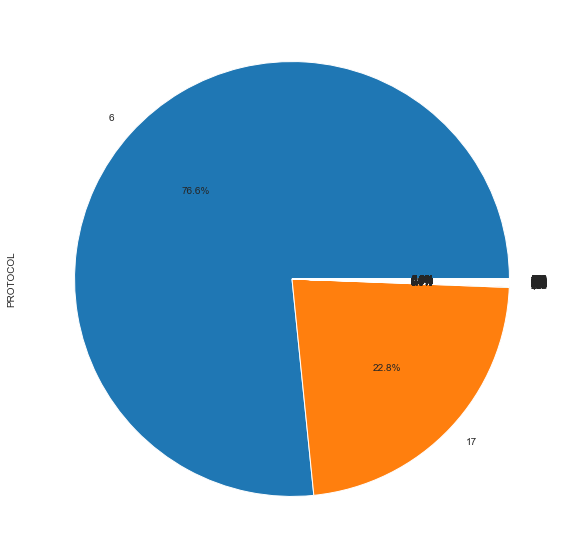

In [31]:
plt.figure(figsize=(10,10))
data_df['PROTOCOL'].value_counts().plot.pie(autopct='%1.1f%%')

## Analysis of subnets ipv4

### Three first octets of the source and destination IP addresses

In [41]:
data_df['IPV4_SRC_ADDR_OCTET1_3']= data_df['IPV4_SRC_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))
data_df['IPV4_DST_ADDR_OCTET1_3']= data_df['IPV4_DST_ADDR'].apply(lambda x: '.'.join(x.split('.')[:3]))

#Statistical description of the source IP addresses
print("Number of distinct source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination networks ", data_df['IPV4_DST_ADDR_OCTET1_3'].nunique())

#The source and destination networks
print("Source networks: ", data_df['IPV4_SRC_ADDR_OCTET1_3'].unique())
print("Destination networks: ", data_df['IPV4_DST_ADDR_OCTET1_3'].unique())

Number of distinct source networks:  7
Number of distinct destination networks  8
Source networks:  ['59.166.0' '175.45.176' '149.171.126' '10.40.85' '10.40.182'
 '192.168.241' '127.0.0']
Destination networks:  ['149.171.126' '59.166.0' '175.45.176' '224.0.0' '192.168.241' '10.40.182'
 '10.40.198' '127.0.0']


### Host part of the source and destination IP addresses

In [42]:
data_df['IPV4_SRC_ADDR_OCTET4']= data_df['IPV4_SRC_ADDR'].apply(lambda x: x.split('.')[-1])
data_df['IPV4_DST_ADDR_OCTET4']= data_df['IPV4_DST_ADDR'].apply(lambda x: x.split('.')[-1])

#Statistical description of the source IP addresses
print("Number of distinct source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].nunique())
#Statistical description of the destination IP addresses
print("Number of distinct destination hosts ", data_df['IPV4_DST_ADDR_OCTET4'].nunique())

# The source and destination hosts
print("Source hosts: ", data_df['IPV4_SRC_ADDR_OCTET4'].unique())
print("Destination hosts: ", data_df['IPV4_DST_ADDR_OCTET4'].unique())

Number of distinct source hosts:  21
Number of distinct destination hosts  23
Source hosts:  ['5' '1' '0' '7' '3' '2' '6' '9' '4' '8' '15' '10' '19' '13' '11' '14'
 '17' '12' '18' '16' '243']
Destination hosts:  ['8' '14' '3' '7' '5' '9' '6' '2' '1' '4' '0' '13' '16' '15' '10' '18'
 '17' '11' '12' '19' '50' '255' '243']


### Source and destination ports

In [45]:
#Statistical description of the source ports
print("Number of distinct source ports: ", data_df['L4_SRC_PORT'].nunique())

#Statistical description of the destination ports
print("Number of distinct destination ports ", data_df['L4_DST_PORT'].nunique())

Number of distinct source ports:  64601
Number of distinct destination ports  64625


<AxesSubplot:xlabel='L4_SRC_PORT', ylabel='Count'>

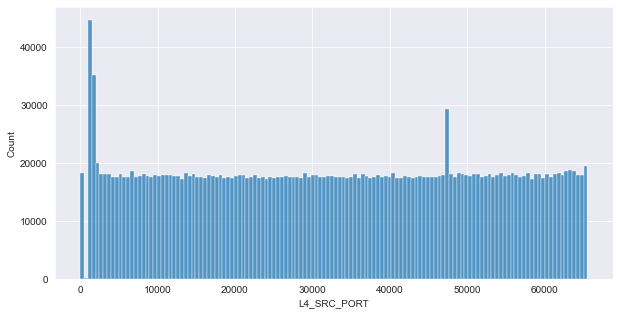

In [50]:
# historgram of the source ports
plt.figure(figsize=(10,5))
sns.histplot(data_df['L4_SRC_PORT'])

<AxesSubplot:xlabel='L4_DST_PORT', ylabel='Count'>

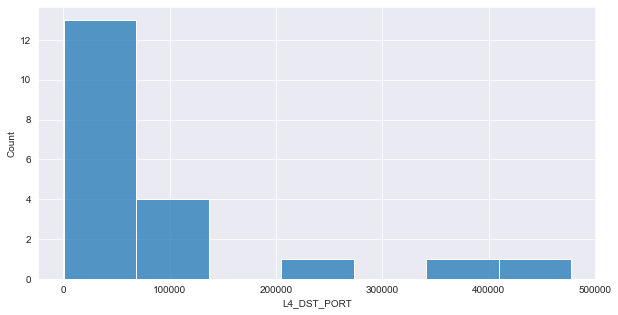

In [57]:
# historgram of the destination ports
plt.figure(figsize=(10,5))
# sns.histplot(data_df['L4_DST_PORT'])
# Only port appearl less than 10000 times
#TOp 20 destination ports
sns.histplot(data_df['L4_DST_PORT'].value_counts().head(20))

# sns.histplot(data_df['L4_DST_PORT'].value_counts().loc[lambda x: x < 10000])


### Ports distribution

#### Destination ports

In [65]:
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_DST_PORT <= 1024')['L4_DST_PORT'].nunique())

# Regular ports : 1025-49151
print("Number of distinct regular ports: ", data_df.query('L4_DST_PORT > 1024 and L4_DST_PORT <= 49151')['L4_DST_PORT'].nunique())

# Dynamic ports : 49152-65535
print("Number of distinct dynamic ports: ", data_df.query('L4_DST_PORT > 49151')['L4_DST_PORT'].nunique())


Number of distinct standard ports:  116
Number of distinct regular ports:  48127
Number of distinct dynamic ports:  16382


#### Source ports

In [66]:
# Standard ports : 0-1024
print("Number of distinct standard ports: ", data_df.query('L4_SRC_PORT <= 1024')['L4_SRC_PORT'].nunique())

# Regular ports : 1025-49151
print("Number of distinct regular ports: ", data_df.query('L4_SRC_PORT > 1024 and L4_SRC_PORT <= 49151')['L4_SRC_PORT'].nunique())

# Dynamic ports : 49152-65535
print("Number of distinct dynamic ports: ", data_df.query('L4_SRC_PORT > 49151')['L4_SRC_PORT'].nunique())


Number of distinct standard ports:  90
Number of distinct regular ports:  48127
Number of distinct dynamic ports:  16384
